In [142]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
import os
import json
from copy import copy
import pandas as pd
import numpy as np
import dill as pickle
import time
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
from adjustText import adjust_text

import sys
sys.path.append('../..')
from models.ihme.util import cities
from utils.util import read_config
from main.seir.forecast import get_forecast, order_trials, top_k_trials, forecast_k
from utils.enums import Columns, SEIRParams



In [144]:
from main.ihme.fitting import single_cycle_multiple
from utils.enums import Columns


In [123]:
config, model_params = read_config('../../scripts/ihme/config/default.yaml')
dist, st, area_names = cities['mumbai']

In [124]:
results = single_cycle_multiple(dist, st, area_names, copy(model_params), which_compartments=Columns.which_compartments(), **config)

../../cache/Mumbai_ts_athena_17062020.pkl
6191
smoothing length truncated to 33
Running PV for 1.0
Fitting model for end time 5Fitting model for end time 6Running PV for 1.0
Fitting model for end time 6Running PV for 1.0
Fitting model for end time 5Fitting model for end time 6Running PV for 1.0
Fitting model for end time 5Fitting model for end time 6

In [125]:
all_preds = results['predictions']['predictions']

In [126]:
all_preds[:5]

,recovered,deceased,hospitalised,total_infected
date,,,,
2020-05-26,14516.268161,1057.051925,17074.771589,32661.686984
2020-05-27,14991.836068,1098.353205,17886.906930,33991.174650
2020-05-28,15459.821526,1140.481100,18727.016262,35339.956313
2020-05-29,15919.123001,1183.412939,19595.469455,36706.422234
2020-05-30,16368.705071,1227.124139,20492.609478,38088.892400


In [146]:
from viz.forecast import plot_forecast_agnostic as plot_forecast

In [147]:
df_true = results['df']

In [137]:
trysum = copy(all_preds)
trysum['total_infected'] = all_preds['recovered'] + all_preds['deceased'] + all_preds['hospitalised']

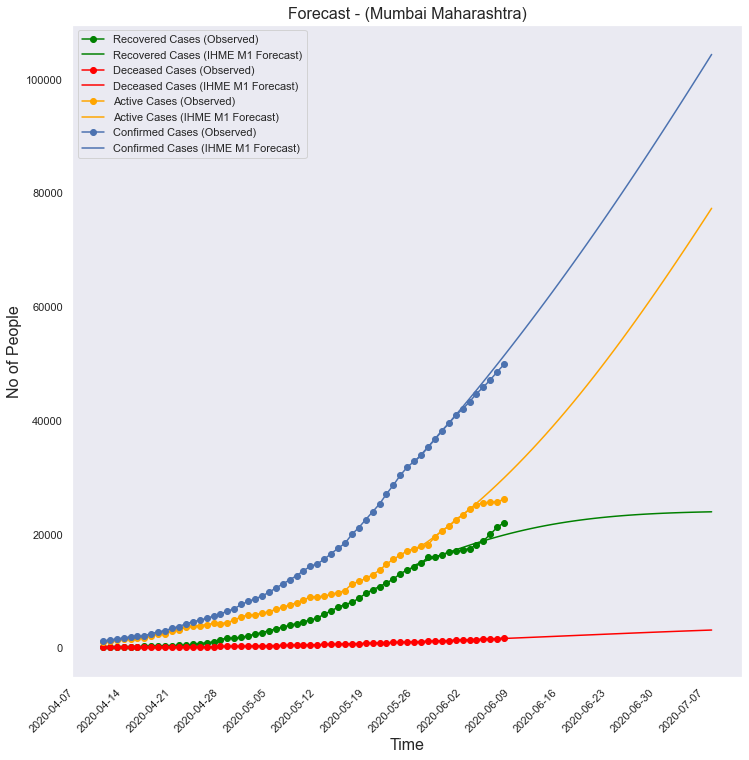

In [152]:
plot_forecast(df_true, trysum.reset_index(), model_name='IHME M1', dist=dist, state=st)

In [ ]:
m2_config = copy(config)
m2_config['test_size'] = 0
results = single_cycle_multiple(dist, st, area_names, copy(model_params), which_compartments=Columns.which_compartments(), **m2_config)